In [1]:
import numpy
import seaborn

import os
import cv2
import imageio

from skimage.feature import local_binary_pattern, hog
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
diretorio = "rafd/"

In [3]:
def extrairVetorCaracteristicaLBP(img):
  radius = 3;
  n_points = 8 * radius;
  ibp_img = local_binary_pattern(img, n_points, radius, 'uniform');
  n_bins = 26;
  hist, _  = numpy.histogram(ibp_img.ravel(),normed=True,
                             bins = n_bins, range = (0,n_bins))
  return hist

In [4]:
def extrairVetorCaracteristicaHOG(img):
  fd = hog(img, orientations = 9, pixels_per_cell=(8, 8),
           cells_per_block=(3,3), block_norm="L2")
  return fd

In [5]:
def get_Pred(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print("Acuracia: ", model.score(X_test, y_test)*100)
  return pred

In [6]:
def classificacaoTransform(y_test):
    palavra=["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"]
    for i in range(len(y_test)):
      if y_test[i].split("_")[2] == palavra[0]:
        y_test[i] = int(0)
      elif y_test[i].split("_")[2] == palavra[1]:
        y_test[i] = int(1)
      elif y_test[i].split("_")[2] == palavra[2]:
        y_test[i] = int(2)
      elif y_test[i].split("_")[2] == palavra[3]:
        y_test[i] = int(3)
      elif y_test[i].split("_")[2] == palavra[4]:
        y_test[i] = int(4)
      elif y_test[i].split("_")[2] == palavra[5]:
        y_test[i] = int(5)
      elif y_test[i].split("_")[2] == palavra[6]:
        y_test[i] = int(6)
      else:
        y_test[i] = int(7)
    return y_test

In [7]:
todasClasses = []
X=[]
y=[]
for dirname, _, filenames in os.walk(diretorio):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        y.append(filename[11:-4])
        #img = cv2.imread(diretorio+filename)
        X.append(cv2.imread(diretorio+filename,0))

In [8]:
LBP = X.copy()
for i in range(len(X)):
    LBP[i]=extrairVetorCaracteristicaLBP(X[i])

In [9]:
Hog = X.copy()
for i in range(len(X)):
    Hog[i]=extrairVetorCaracteristicaHOG(X[i])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_trainLBP, X_testLBP, y_trainLBP, y_testLBP = train_test_split(LBP, y, test_size=0.30, random_state=42)

# Treino
X_trainLBP = numpy.array(X_trainLBP)
y_trainLBP = numpy.array(y_trainLBP)


# Teste
X_testLBP = numpy.array(X_testLBP)
y_testLBP = numpy.array(y_testLBP)

In [12]:
X_trainHOG, X_testHOG, y_trainHOG, y_testHOG = train_test_split(Hog, y, test_size=0.30, random_state=42)

# Treino
X_trainHOG = numpy.array(X_trainHOG)
y_trainHOG = numpy.array(y_trainHOG)


# Teste
X_testHOG = numpy.array(X_testHOG)
y_testHOG = numpy.array(y_testHOG)

In [13]:
#HOG
y_testHOG=classificacaoTransform(y_testHOG)
y_trainHOG=classificacaoTransform(y_trainHOG)

#LBP
y_testLBP=classificacaoTransform(y_testLBP)
y_trainLBP=classificacaoTransform(y_trainLBP)

In [14]:
#reshape do HOG
#nsamples, nx, ny = X_trainHOG.shape
#d2_train_datasetHOG = X_trainHOG.reshape((nsamples,nx*ny))
#X_trainHOG = d2_train_datasetHOG

#nsamples, nx, ny = X_testHOG.shape
#d2_train_datasetHOG = X_testHOG.reshape((nsamples,nx*ny))
#X_testHOG = d2_train_datasetHOG

In [15]:
#reshape do LBP
#nsamples, nx, ny = y_trainLBP.shape
#d2_train_dataset = y_trainLBP.reshape((nsamples,nx*ny))
#X_train = d2_train_dataset

#nsamples, nx, ny = y_testLBP.shape
#d2_train_dataset = y_testLBP.reshape((nsamples,nx*ny))
#y_testLBP = d2_train_dataset

In [16]:
ROGRandomForestClassifier = get_Pred(RandomForestClassifier(max_depth=90,min_samples_leaf=1,min_samples_split=10,n_estimators = 500, random_state=109), X_trainHOG, X_testHOG, y_trainHOG, y_testHOG)
ROGDecisionTreeClassifier = get_Pred(DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='auto',min_samples_leaf = 2, min_samples_split=8, splitter='best',random_state=109), X_trainHOG, X_testHOG, y_trainHOG, y_testHOG)

Acuracia:  84.05797101449275
Acuracia:  44.3064182194617


In [17]:
LBPRandomForestClassifier = get_Pred(RandomForestClassifier(max_depth=90,min_samples_leaf=1,min_samples_split=10,n_estimators = 500, random_state=109), X_trainLBP, X_testLBP, y_trainLBP, y_testLBP)
LBPDecisionTreeClassifier = get_Pred(DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='auto',min_samples_leaf = 2, min_samples_split=8, splitter='best',random_state=109), X_trainLBP, X_testLBP, y_trainLBP, y_testLBP)

Acuracia:  31.262939958592135
Acuracia:  21.11801242236025


As matrizes de confusão ficaram organizadas na seguinte ordem:

1 ROG + Arvore de Decisão

2 ROG + Randon Forest

3 LBP + Arvore de Decisão

4 LBP + Randon Forest

<AxesSubplot:>

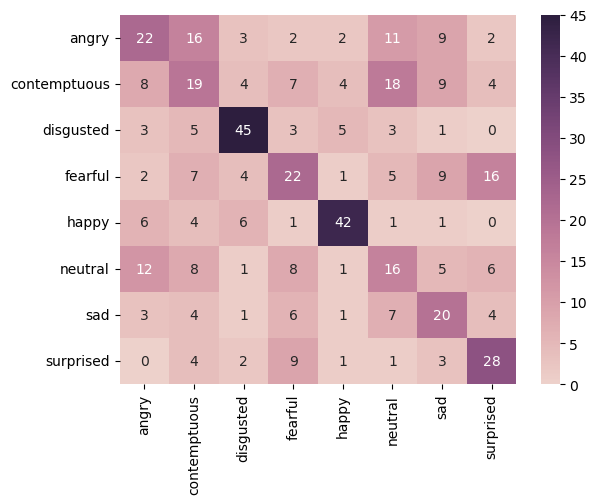

In [18]:
confHOGDT = metrics.confusion_matrix(ROGDecisionTreeClassifier,y_testHOG)
cmapHOGDT = seaborn.cubehelix_palette(as_cmap = True)
seaborn.heatmap(confHOGDT, cmap = cmapHOGDT, xticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], yticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], annot = True)
#como plotar um de cada para isso eu precisaria pegar os resultados dos testes de cada um assim como as predições e guardar em uma matriz depois rodar essa matriz

<AxesSubplot:>

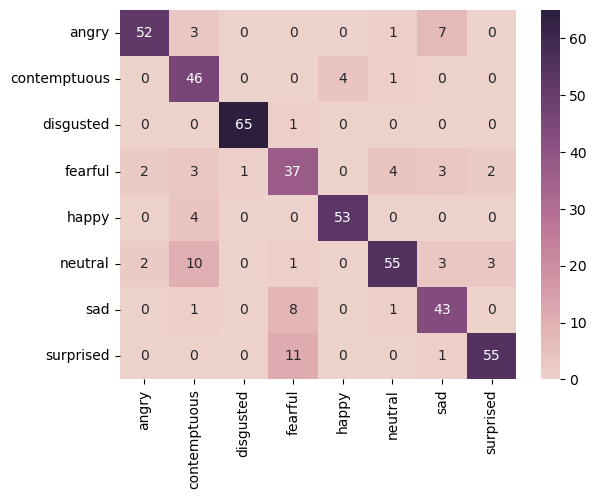

In [19]:
confHOGRF = metrics.confusion_matrix(ROGRandomForestClassifier,y_testHOG)
cmapHOGRF = seaborn.cubehelix_palette(as_cmap = True)
seaborn.heatmap(confHOGRF, cmap = cmapHOGRF, xticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], yticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], annot = True)

<AxesSubplot:>

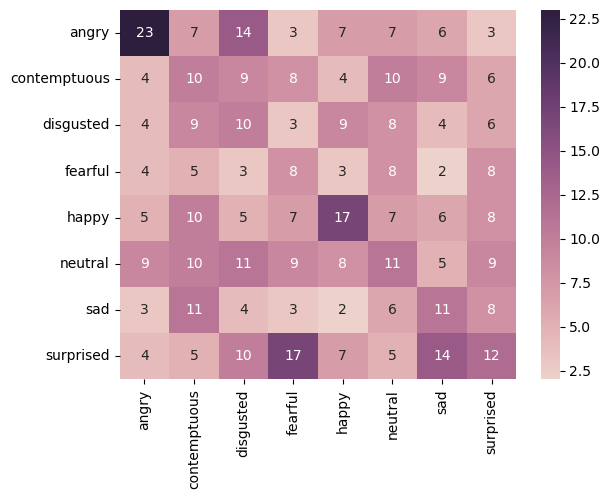

In [20]:
confLBPDT = metrics.confusion_matrix(LBPDecisionTreeClassifier,y_testLBP)
cmapLBPDT = seaborn.cubehelix_palette(as_cmap = True)
seaborn.heatmap(confLBPDT, cmap = cmapLBPDT, xticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], yticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], annot = True)

<AxesSubplot:>

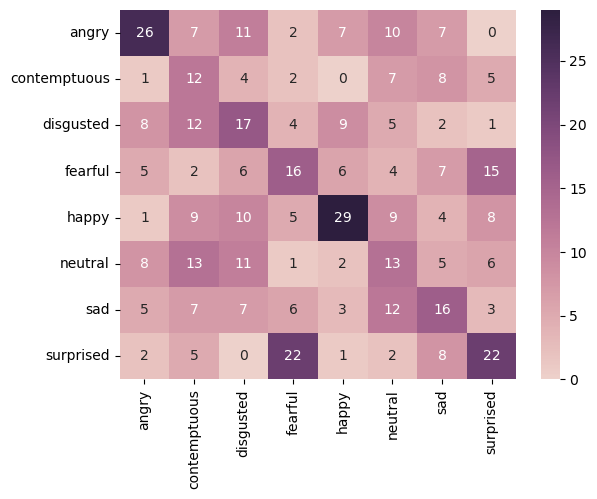

In [21]:
confLBPRF = metrics.confusion_matrix(LBPRandomForestClassifier,y_testLBP)
cmapLBPRF = seaborn.cubehelix_palette(as_cmap = True)
seaborn.heatmap(confLBPRF, cmap = cmapLBPRF, xticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], yticklabels = ["angry","contemptuous","disgusted","fearful","happy","neutral","sad","surprised"], annot = True)

Com isso pode-se concluir que os algoritmos em que foram empregados o ROG tiveram uma melhor precisão do que os que implementaram o LBP, e que a Randon Forest obteve uma matriz mais precisa do que a da arvore de decisão.